In [1]:
"""
Created on Mon Apr 20 15:24:47 2020

Visualise embeddings

@author: Administrator
"""
import pandas as pd
import pickle

with open('G:/My Drive/DublinAI/Mini Projects/chatbot/nn/embeddings_smaller', 'rb') as file:
    embed, movie_to_index = pickle.load(file)

df = pd.read_csv('./the-movies-dataset/df_prep.csv',low_memory=False)
df['genres'] = df['genres'].fillna('') 

In [4]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

twoD_embed = TSNE(n_components=2).fit_transform(embed)

In [10]:
placeholder = [x for x in df['genres'] if isinstance(x,str)]
genres = list(set((', '.join(placeholder)).split(", ")))
genres.remove('')
print(genres)

['Mystery', 'Adventure', 'Animation', 'History', 'TV Movie', 'Western', 'Action', 'Foreign', 'Horror', 'Family', 'Music', 'Comedy', 'Thriller', 'Fantasy', 'Science Fiction', 'Romance', 'Drama', 'Crime', 'Documentary', 'War']


Animation
Horror


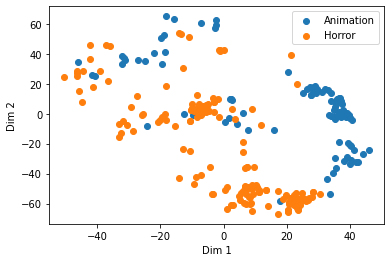

In [8]:
to_plot = [2,8]

for i in range(len(to_plot)):
    ids = df['genres'].apply(lambda x: genres[to_plot[i]] in x.split(', ')[0])
    vecs = list(map(int,list(df['newId'][ids].copy())))
    #genre_mapping[genres[i]] = vecs
    plt.scatter(twoD_embed[vecs,0],twoD_embed[vecs,1],label=genres[to_plot[i]])
    print(genres[to_plot[i]])

plt.legend() 
plt.xlabel('Dim 1')  
plt.ylabel('Dim 2')   
plt.show()

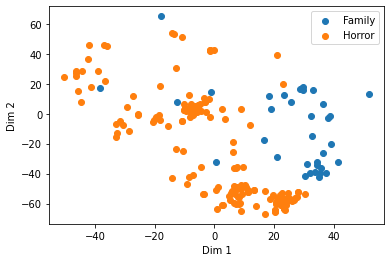

In [12]:
to_plot = [9,8]

for i in range(len(to_plot)):
    ids = df['genres'].apply(lambda x: genres[to_plot[i]] in x.split(', ')[0])
    vecs = list(map(int,list(df['newId'][ids].copy())))
    plt.scatter(twoD_embed[vecs,0],twoD_embed[vecs,1],label=genres[to_plot[i]])

plt.legend()    
plt.xlabel('Dim 1')  
plt.ylabel('Dim 2')   
plt.show()

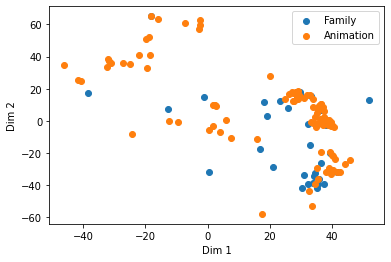

In [14]:
to_plot = [9,2]

for i in range(len(to_plot)):
    ids = df['genres'].apply(lambda x: genres[to_plot[i]] in x.split(', ')[0])
    vecs = list(map(int,list(df['newId'][ids].copy())))
    plt.scatter(twoD_embed[vecs,0],twoD_embed[vecs,1],label=genres[to_plot[i]])

plt.legend()    
plt.xlabel('Dim 1')  
plt.ylabel('Dim 2')   
plt.show()

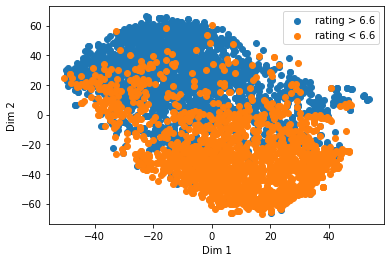

In [15]:
df['vote_average'].describe()
ids = df['vote_average'].apply(lambda x: x>6.6)
high_rated_vecs = list(map(int,list(df['newId'][ids].copy())))
ids = df['vote_average'].apply(lambda x: x<6.6)
low_rated_vecs = list(map(int,list(df['newId'][ids].copy())))

plt.scatter(twoD_embed[high_rated_vecs,0],twoD_embed[high_rated_vecs,1],label='rating > 6.6')
plt.scatter(twoD_embed[low_rated_vecs,0],twoD_embed[low_rated_vecs,1],label='rating < 6.6')
plt.legend()
plt.xlabel('Dim 1')  
plt.ylabel('Dim 2')   
plt.show()